## ***Customer Churn Analysis & Retention Strategy for a Subscription Service***

**Goal:** To identify factors contributing to customer churn in a hypothetical subscription service and propose data-driven strategies to improve customer retention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

### **Exploratory Data Analysis**

**Basic Statistics**

In [3]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.value_counts()

,,,,,,,,,,,,count
customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,
15815316,644,France,Male,50,9,76817.00,4,1,0,196371.13,1,1
15815295,662,France,Female,38,2,96479.81,1,1,0,120259.41,0,1
15815271,755,Germany,Male,43,6,165048.50,3,1,0,16929.41,1,1
15815259,835,France,Female,56,2,0.00,2,1,1,39820.13,0,1
15815236,574,Spain,Male,34,5,0.00,2,0,0,28269.86,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,1
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1


**Churn Rate**

In [6]:
#Calculate the overall churn rate and the churn rate across different categories

# Overall churn rate
overall_churn_rate = data['churn'].mean()
print(f"Overall Churn Rate: {overall_churn_rate:.2f}")

Overall Churn Rate: 0.20


In [7]:

# Churn rate by country
churn_by_country = data.groupby('country')['churn'].mean().sort_values(ascending=False)
print("\nChurn Rate by Country:")
print(churn_by_country)



Churn Rate by Country:
country
Germany    0.324432
Spain      0.166734
France     0.161548
Name: churn, dtype: float64


In [8]:
# Churn rate by products_number
churn_by_products_number = data.groupby('products_number')['churn'].mean().sort_values(ascending=False)
print("\nChurn Rate by Products Number:")
print(churn_by_products_number)



Churn Rate by Products Number:
products_number
4    1.000000
3    0.827068
1    0.277144
2    0.075817
Name: churn, dtype: float64


In [9]:

# Churn rate by active_member
churn_by_active_member = data.groupby('active_member')['churn'].mean().sort_values(ascending=False)
print("\nChurn Rate by Active Member:")
churn_by_active_member


Churn Rate by Active Member:


,churn
active_member,
0,0.268509
1,0.142691


**Visualizations**

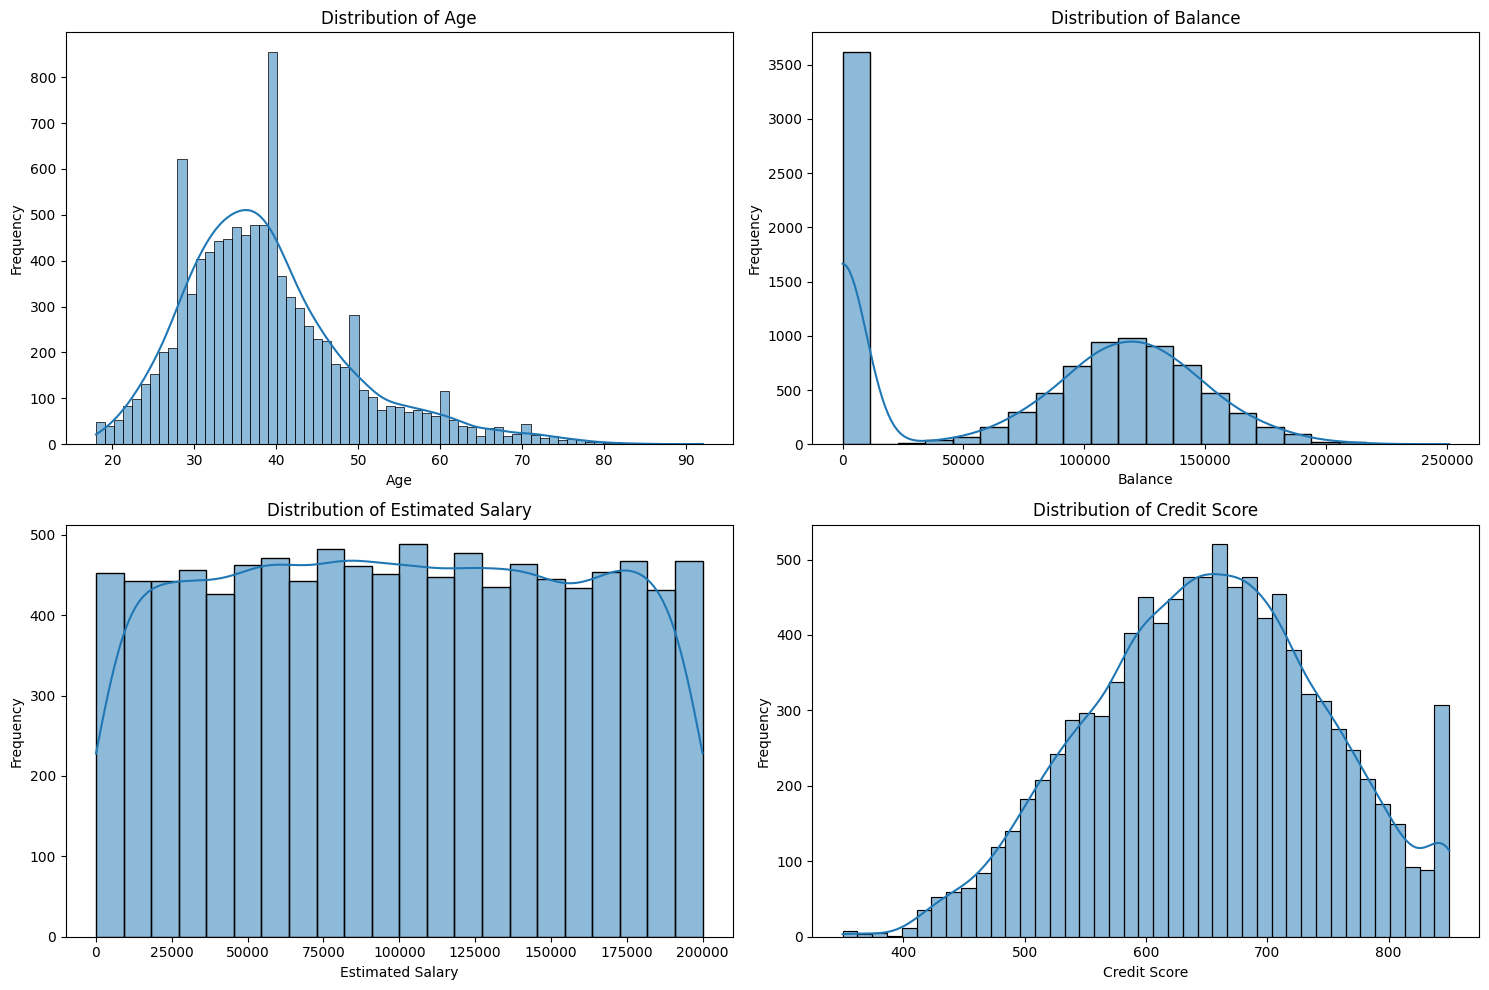

In [10]:
# Histograms for numerical features
numerical_features = ['age', 'balance', 'estimated_salary', 'credit_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

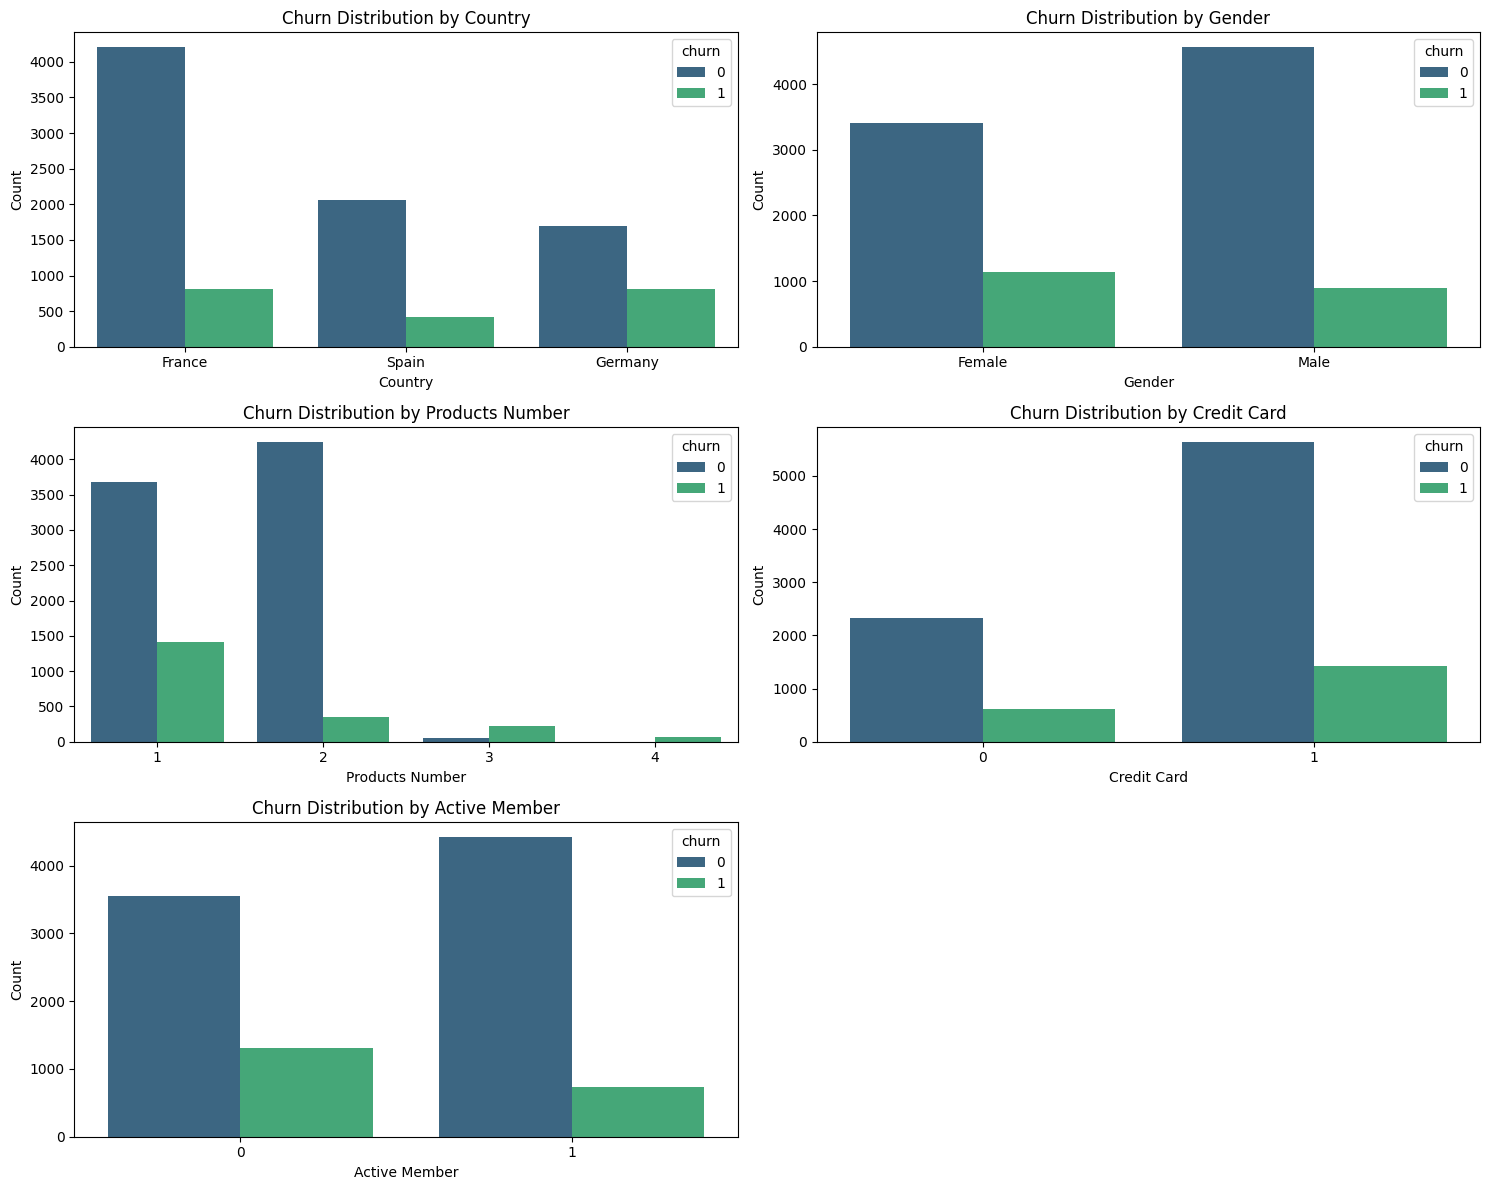

In [11]:
# Bar plots for categorical features against churn
categorical_features = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=data, x=col, hue='churn', palette='viridis')
    plt.title(f'Churn Distribution by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-3056335933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='churn', y=col, palette='plasma')
/tmp/ipython-input-12-3056335933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='churn', y=col, palette='plasma')
/tmp/ipython-input-12-3056335933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='churn', y=col, palette='plasma')
/tmp/ipython-input-12-3056335933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

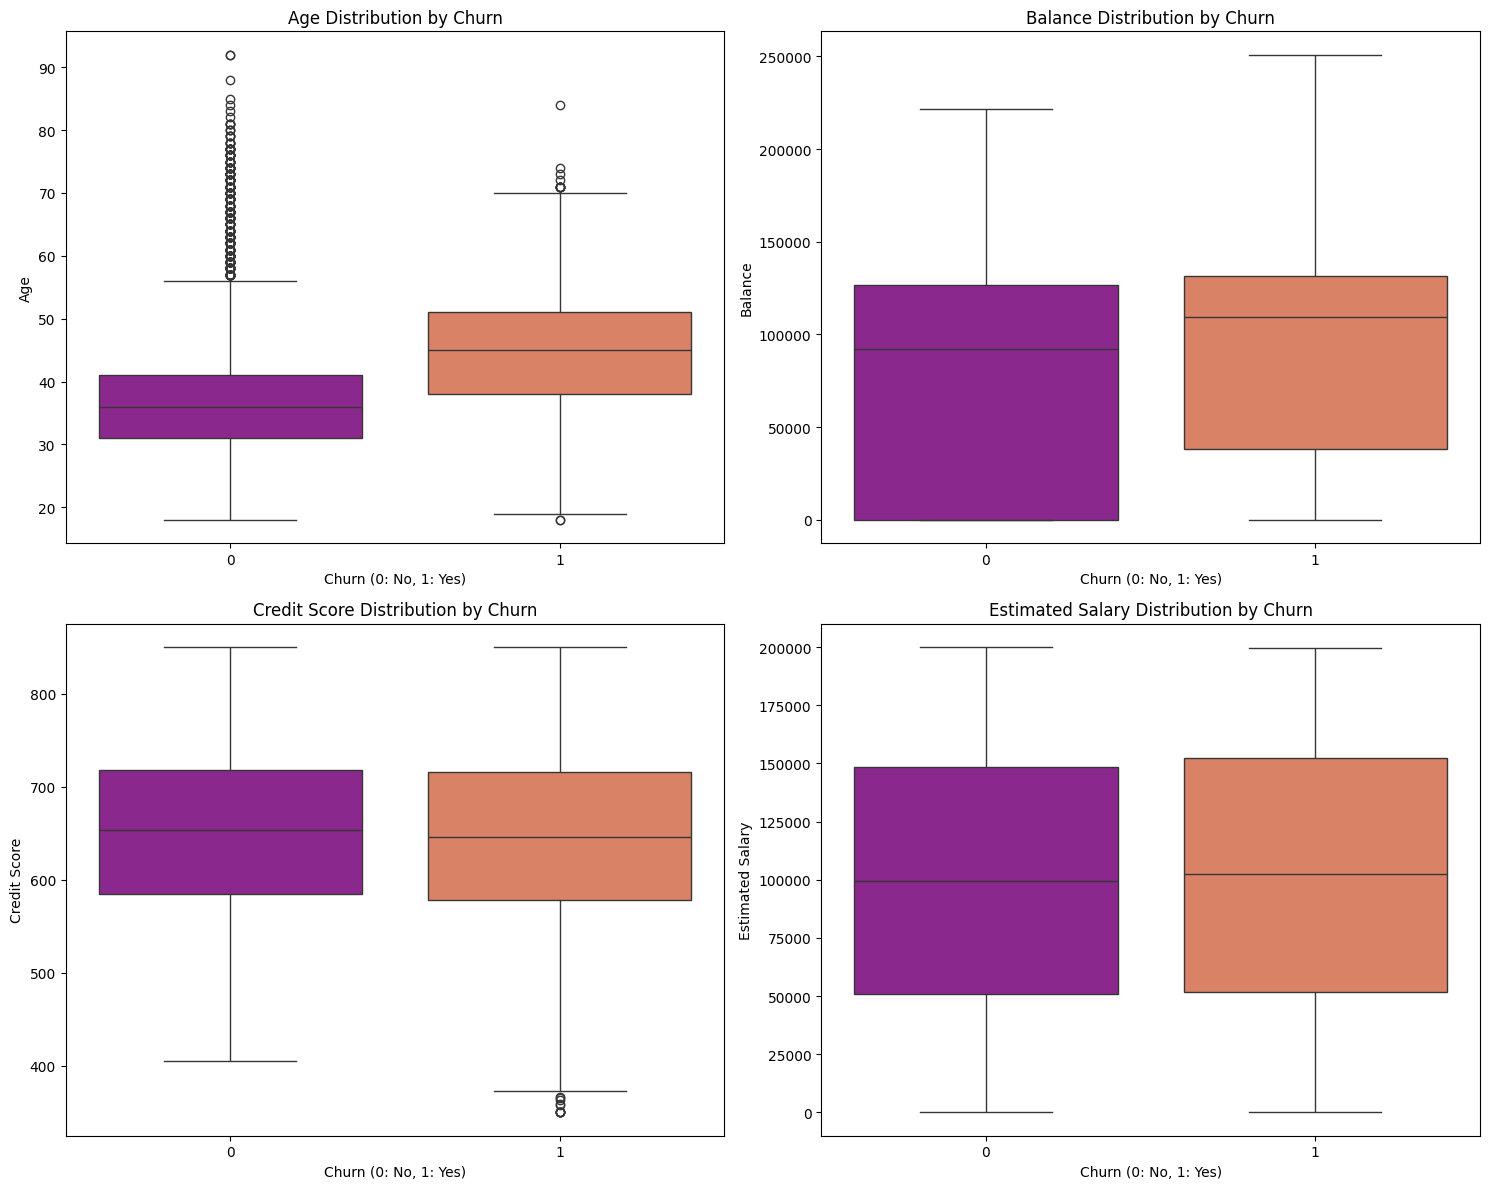

In [12]:
# Box plots or violin plots for numerical features vs. churn
numerical_features = ['age', 'balance', 'credit_score', 'estimated_salary']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x='churn', y=col, palette='plasma')
    # Alternatively, use violinplot:
    # sns.violinplot(data=data, x='churn', y=col, palette='plasma')
    plt.title(f'{col.replace("_", " ").title()} Distribution by Churn')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

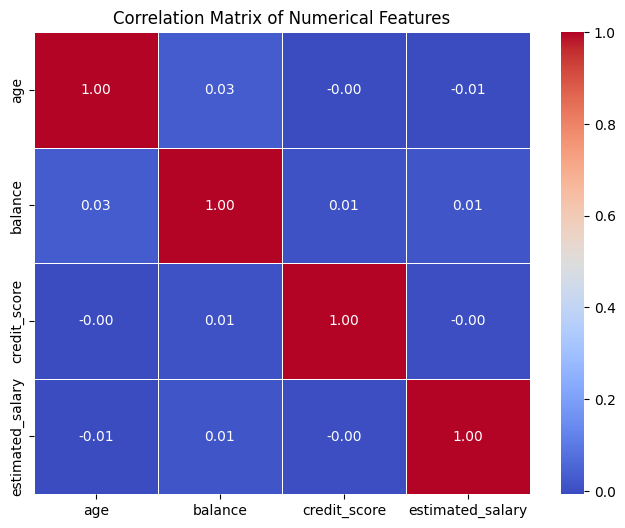

In [13]:
# Visualize correlations
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
from scipy.stats import chi2_contingency, ttest_ind

# Statistical tests for categorical features (Chi-squared test)
print("\n--- Statistical Tests for Categorical Features (Chi-squared) ---")
categorical_features = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

for col in categorical_features:
    contingency_table = pd.crosstab(data[col], data['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-squared test for {col}:")
    print(f"  Chi2 Statistic: {chi2:.4f}")
    print(f"  P-value: {p:.4f}")
    if p < 0.05:
        print(f"  Result: The difference in churn rate across {col} is statistically significant (p < 0.05).")
    else:
        print(f"  Result: The difference in churn rate across {col} is not statistically significant (p >= 0.05).")

# Statistical tests for numerical features (Independent Samples t-test)
print("\n--- Statistical Tests for Numerical Features (Independent Samples t-test) ---")
numerical_features = ['age', 'balance', 'estimated_salary', 'credit_score']

# Separate data by churn status
churn_yes = data[data['churn'] == 1]
churn_no = data[data['churn'] == 0]

for col in numerical_features:
    # Perform independent samples t-test
    # We assume unequal variances (Welch's t-test) which is generally safer
    # For equal variances, set equal_var=True
    t_statistic, p_value = ttest_ind(churn_yes[col], churn_no[col], equal_var=False, nan_policy='omit')

    print(f"\nIndependent Samples t-test for {col}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"  Result: The difference in the mean of {col} between churn and non-churn groups is statistically significant (p < 0.05).")
    else:
        print(f"  Result: The difference in the mean of {col} between churn and non-churn groups is not statistically significant (p >= 0.05).")


--- Statistical Tests for Categorical Features (Chi-squared) ---

Chi-squared test for country:
  Chi2 Statistic: 301.2553
  P-value: 0.0000
  Result: The difference in churn rate across country is statistically significant (p < 0.05).

Chi-squared test for gender:
  Chi2 Statistic: 112.9186
  P-value: 0.0000
  Result: The difference in churn rate across gender is statistically significant (p < 0.05).

Chi-squared test for products_number:
  Chi2 Statistic: 1503.6294
  P-value: 0.0000
  Result: The difference in churn rate across products_number is statistically significant (p < 0.05).

Chi-squared test for credit_card:
  Chi2 Statistic: 0.4713
  P-value: 0.4924
  Result: The difference in churn rate across credit_card is not statistically significant (p >= 0.05).

Chi-squared test for active_member:
  Chi2 Statistic: 242.9853
  P-value: 0.0000
  Result: The difference in churn rate across active_member is statistically significant (p < 0.05).

--- Statistical Tests for Numerical Feat

### **Feature Engineering**

In [15]:
# Binning Age
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 45, 60, 92], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'], right=True)

# Creating an interaction term
# This term could potentially show if customers with high balance and many products are more or less likely to churn.
data['balance_x_products'] = data['balance'] * data['products_number']

# One-Hot Encode the new 'age_group' feature
data = pd.get_dummies(data, columns=['age_group'], prefix='age_group', drop_first=True)

# You might want to inspect the first few rows to see the new features
print("\nDataFrame with new features:")
print(data.head())

# You can also check the churn rate across the new age groups
print("\nChurn Rate by Age Group:")
print(data.groupby('age_group_Middle-aged')['churn'].mean()) # Example for one dummy variable


DataFrame with new features:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  \
0                1            1              1         101348.88      1   
1                1            0              1         112542.58      0   
2                3            1              0         113931.57      1   
3                2            0              0          93826.63      0   
4                1            1              1          79084.10      0   

   balance_x_products  age_group_Middle-aged  age_group_Senior  \
0                0.0

In [16]:
data.to_csv('customerChurn.csv', index=False)